# Pengangguran, Tenaga Kerja, Jawa Timur

In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sklearn.preprocessing
import math
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import itertools
import warnings

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

# Preparation & Data Cleaning

In [ ]:
#The Datas
# All the data is from BPS. Credits to them.
# https://www.bps.go.id/id/statistics-table?subject=520

Tingkat_Pengangguran_Terbuka_Jawa_Timur_2000_2023 = 'https://raw.githubusercontent.com/HilmiGH/dataset_mix_tenaga_kerja_bps_2010_2023/main/Tingkat%20Pengangguran%20Terbuka%20Jawa%20Timur%202000%20-%202023.csv'
Jumlah_Tenaga_Kerja_Jawa_Timur_2013_2022 = 'https://raw.githubusercontent.com/HilmiGH/dataset_mix_tenaga_kerja_bps_2010_2023/main/Jumlah%20Tenaga%20Kerja%20Jawa%20Timur%202013%20-%202022.csv'
Penduduk_Berumur_15_Tahun_ke_Atas_Jawa_Timur_dan_Jenis_Kegiatan_Selama_Seminggu_yang_Lalu_2018_2023  = 'https://raw.githubusercontent.com/HilmiGH/dataset_mix_tenaga_kerja_bps_2010_2023/main/Penduduk%20Berumur%2015%20Tahun%20ke%20Atas%20Jawa%20Timur%20dan%20Jenis%20Kegiatan%20Selama%20Seminggu%20yang%20Lalu%202018%20-%202022.csv'





## Tingkat Pengangguran Terbuka Jawa Timur 2000 - 2023

In [ ]:
df_tpt = pd.read_csv(Tingkat_Pengangguran_Terbuka_Jawa_Timur_2000_2023)
df_tpt.head(5)

,Tahun,Tingkat Pengangguran Terbuka Jawa Timur (Persen)
0,2000,4.39
1,2001,6.51
2,2002,6.43
3,2003,8.79
4,2004,7.69


In [ ]:
df_tpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Tahun                                             24 non-null     int64  
 1   Tingkat Pengangguran Terbuka Jawa Timur (Persen)  24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes


In [ ]:
df_tpt.isna().sum()

Tahun                                               0
Tingkat Pengangguran Terbuka Jawa Timur (Persen)    0
dtype: int64

In [ ]:
df_tpt_indexed = df_tpt.set_index('Tahun')

In [ ]:
df_tpt_indexed.head(5)

,Tingkat Pengangguran Terbuka Jawa Timur (Persen)
Tahun,
2000,4.39
2001,6.51
2002,6.43
2003,8.79
2004,7.69


In [ ]:
df_tpt.head(5)

,Tahun,Tingkat Pengangguran Terbuka Jawa Timur (Persen)
0,2000,4.39
1,2001,6.51
2,2002,6.43
3,2003,8.79
4,2004,7.69


## Jumlah Tenaga Kerja Jawa Timur 2013 - 2022

In [ ]:
df_tk = pd.read_csv(Jumlah_Tenaga_Kerja_Jawa_Timur_2013_2022)
df_tk.head(5)

,Tahun,Mikro,Kecil
0,2013,1072286.00,723019.00
1,2014,1195368.00,347668.00
2,2015,1518302.00,398088.00
3,2016,NaN,NaN
4,2017,1448206.00,1267957.00


In [ ]:
df_tk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tahun   10 non-null     int64  
 1   Mikro   9 non-null      float64
 2   Kecil   9 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 368.0 bytes


In [ ]:
df_tk.isna().sum()

Tahun    0
Mikro    1
Kecil    1
dtype: int64

In [ ]:
# Assuming df_tk is your DataFrame
columns_to_fill = ['Mikro', 'Kecil']

# Interpolate NaN values in specified columns using linear interpolation
df_tk[columns_to_fill] = df_tk[columns_to_fill].interpolate(method='linear', axis=0, limit_area='inside')

In [ ]:
df_tk.head(5)

,Tahun,Mikro,Kecil
0,2013,1072286.00,723019.00
1,2014,1195368.00,347668.00
2,2015,1518302.00,398088.00
3,2016,1483254.00,833022.50
4,2017,1448206.00,1267957.00


In [ ]:
df_tk_indexed = df_tk.set_index('Tahun')

In [ ]:
df_tk_indexed.head(5)

,Mikro,Kecil
Tahun,,
2013,1072286.00,723019.00
2014,1195368.00,347668.00
2015,1518302.00,398088.00
2016,1483254.00,833022.50
2017,1448206.00,1267957.00


In [ ]:
df_tk_indexed

,Mikro,Kecil
Tahun,,
2013,1072286.00,723019.00
2014,1195368.00,347668.00
2015,1518302.00,398088.00
2016,1483254.00,833022.50
2017,1448206.00,1267957.00
2018,1333853.00,780600.00
2019,1461011.00,919662.00
2020,1345443.00,1089835.00
2021,1332360.00,771832.00


## Penduduk Berumur 15 Tahun ke Atas Jawa Timur dan Jenis Kegiatan Selama Seminggu yang Lalu 2018 - 2023

In [ ]:
df_penduduk = pd.read_csv(Penduduk_Berumur_15_Tahun_ke_Atas_Jawa_Timur_dan_Jenis_Kegiatan_Selama_Seminggu_yang_Lalu_2018_2023)
df_penduduk.head(5)

,Tahun,Angkatan Kerja - Bekerja,Angkatan Kerja Pengangguran - Pernah Bekerja,Angkatan Kerja Pengangguran - Tidak Pernah Bekerja,Angkatan Kerja Pengangguran - Jumlah,Angkatan Kerja - Jumlah Angkatan Kerja,Angkatan Kerja - Persentase Bekerja terhadap Angkatan Kerja,Bukan Angkatan Kerja - Sekolah,Bukan Angkatan Kerja - Mengurus Rumah Tangga,Bukan Angkatan Kerja - Lainnya,Bukan Angkatan Kerja - Jumlah Bukan Angkatan Kerja,Angkatan Kerja + Bukan Angkatan Kerja (Jumlah ),Persentase Angkatan Kerja terhadap Penduduk Usia Kerja
0,2018,20449949,422282,428192,850474,21300423,96.01,2327947,5899262,1176853,9404062,30704485,69.37
1,2019,20655632,422084,421670,843754,21499386,96.08,2238697,5943158,1277604,9459459,30958845,69.45
2,2020,20962967,772402,528743,1301145,22264112,94.16,2095398,5901685,1397016,9394099,31658211,70.33
3,2021,21037750,673085,608310,1281395,22319145,94.26,2042868,5941321,1582369,9566558,31885703,70.00
4,2022,21613293,622543,633176,1255719,22869012,94.51,2038831,5980649,1217999,9237479,32106491,71.23


In [ ]:
df_penduduk.isna().sum()

Tahun                                                          0
Angkatan Kerja - Bekerja                                       0
Angkatan Kerja Pengangguran - Pernah Bekerja                   0
Angkatan Kerja Pengangguran - Tidak Pernah Bekerja             0
Angkatan Kerja Pengangguran - Jumlah                           0
Angkatan Kerja - Jumlah Angkatan Kerja                         0
Angkatan Kerja - Persentase Bekerja terhadap Angkatan Kerja    0
Bukan Angkatan Kerja - Sekolah                                 0
Bukan Angkatan Kerja - Mengurus Rumah Tangga                   0
Bukan Angkatan Kerja - Lainnya                                 0
Bukan Angkatan Kerja - Jumlah Bukan Angkatan Kerja             0
Angkatan Kerja + Bukan Angkatan Kerja (Jumlah )                0
Persentase Angkatan Kerja terhadap Penduduk Usia Kerja         0
dtype: int64

In [ ]:
df_penduduk_indexed = df_penduduk.set_index('Tahun')

In [ ]:
df_penduduk_indexed.head(5)

,Angkatan Kerja - Bekerja,Angkatan Kerja Pengangguran - Pernah Bekerja,Angkatan Kerja Pengangguran - Tidak Pernah Bekerja,Angkatan Kerja Pengangguran - Jumlah,Angkatan Kerja - Jumlah Angkatan Kerja,Angkatan Kerja - Persentase Bekerja terhadap Angkatan Kerja,Bukan Angkatan Kerja - Sekolah,Bukan Angkatan Kerja - Mengurus Rumah Tangga,Bukan Angkatan Kerja - Lainnya,Bukan Angkatan Kerja - Jumlah Bukan Angkatan Kerja,Angkatan Kerja + Bukan Angkatan Kerja (Jumlah ),Persentase Angkatan Kerja terhadap Penduduk Usia Kerja
Tahun,,,,,,,,,,,,
2018,20449949,422282,428192,850474,21300423,96.01,2327947,5899262,1176853,9404062,30704485,69.37
2019,20655632,422084,421670,843754,21499386,96.08,2238697,5943158,1277604,9459459,30958845,69.45
2020,20962967,772402,528743,1301145,22264112,94.16,2095398,5901685,1397016,9394099,31658211,70.33
2021,21037750,673085,608310,1281395,22319145,94.26,2042868,5941321,1582369,9566558,31885703,70.00
2022,21613293,622543,633176,1255719,22869012,94.51,2038831,5980649,1217999,9237479,32106491,71.23


In [ ]:
df_penduduk.head(5)

,Tahun,Angkatan Kerja - Bekerja,Angkatan Kerja Pengangguran - Pernah Bekerja,Angkatan Kerja Pengangguran - Tidak Pernah Bekerja,Angkatan Kerja Pengangguran - Jumlah,Angkatan Kerja - Jumlah Angkatan Kerja,Angkatan Kerja - Persentase Bekerja terhadap Angkatan Kerja,Bukan Angkatan Kerja - Sekolah,Bukan Angkatan Kerja - Mengurus Rumah Tangga,Bukan Angkatan Kerja - Lainnya,Bukan Angkatan Kerja - Jumlah Bukan Angkatan Kerja,Angkatan Kerja + Bukan Angkatan Kerja (Jumlah ),Persentase Angkatan Kerja terhadap Penduduk Usia Kerja
0,2018,20449949,422282,428192,850474,21300423,96.01,2327947,5899262,1176853,9404062,30704485,69.37
1,2019,20655632,422084,421670,843754,21499386,96.08,2238697,5943158,1277604,9459459,30958845,69.45
2,2020,20962967,772402,528743,1301145,22264112,94.16,2095398,5901685,1397016,9394099,31658211,70.33
3,2021,21037750,673085,608310,1281395,22319145,94.26,2042868,5941321,1582369,9566558,31885703,70.00
4,2022,21613293,622543,633176,1255719,22869012,94.51,2038831,5980649,1217999,9237479,32106491,71.23


# EDA & Plotting

## Tingkat Pengangguran Terbuka Jawa Timur 2000 - 2023

In [ ]:
df_tpt_indexed.describe().round(2)

,Tingkat Pengangguran Terbuka Jawa Timur (Persen)
count,24.00
mean,5.56
std,1.55
min,3.77
25%,4.24
50%,5.23
75%,6.45
max,8.79


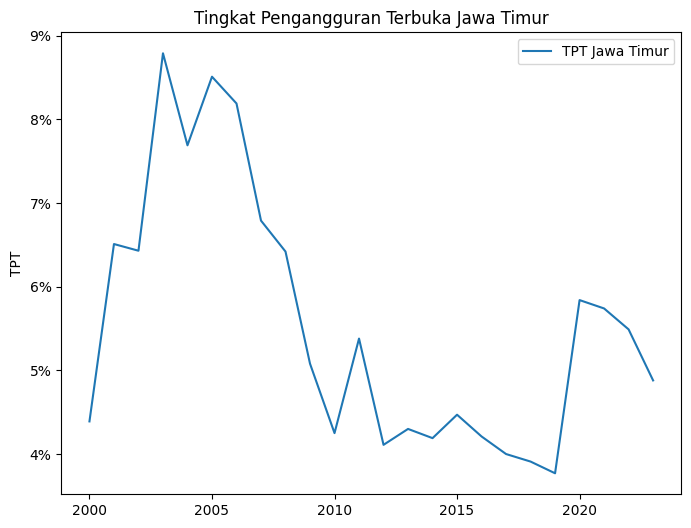

In [ ]:
plt.figure(figsize=(8, 6))

# Plotting the line
plt.plot(df_tpt_indexed, label='TPT Jawa Timur')

# Set title and labels
plt.title('Tingkat Pengangguran Terbuka Jawa Timur')
plt.xlabel('')
plt.ylabel('TPT')

# Adding percentage formatting to y-axis ticks
def percentage(x, pos):
    return '{:.0f}%'.format(x)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percentage))

# Show legend
plt.legend()

plt.show()

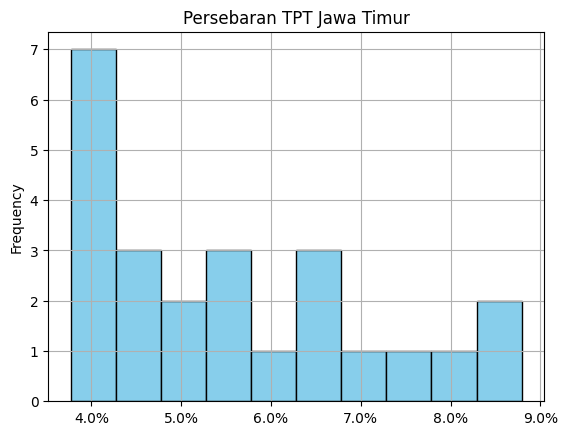

In [ ]:
plt.hist(df_tpt['Tingkat Pengangguran Terbuka Jawa Timur (Persen)'], color='skyblue', edgecolor='black')

plt.ylabel('Frequency')
plt.title('Persebaran TPT Jawa Timur')

# Formatting x-axis ticks to include '%' symbol
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x}%'))

plt.grid(True)
plt.show()


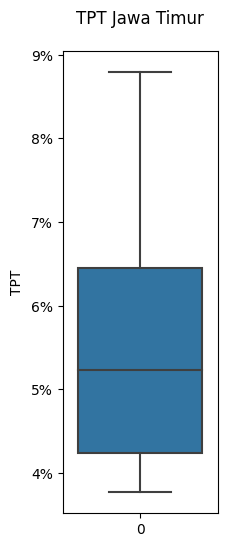

In [ ]:
plt.figure(figsize=(2, 6))
sns.boxplot(data=df_tpt['Tingkat Pengangguran Terbuka Jawa Timur (Persen)'])
plt.title('TPT Jawa Timur', pad=20)
plt.ylabel('TPT', labelpad=5)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percentage))

plt.show()

## Jumlah Tenaga Kerja Jawa Timur 2013 - 2022

In [ ]:
df_tk_indexed.describe().round(2)

,Mikro,Kecil
count,10.00,10.00
mean,1447097.30,728956.35
std,323514.76,342130.10
min,1072286.00,157880.00
25%,1332733.25,479320.75
50%,1396824.50,776216.00
75%,1477693.25,898002.12
max,2280890.00,1267957.00


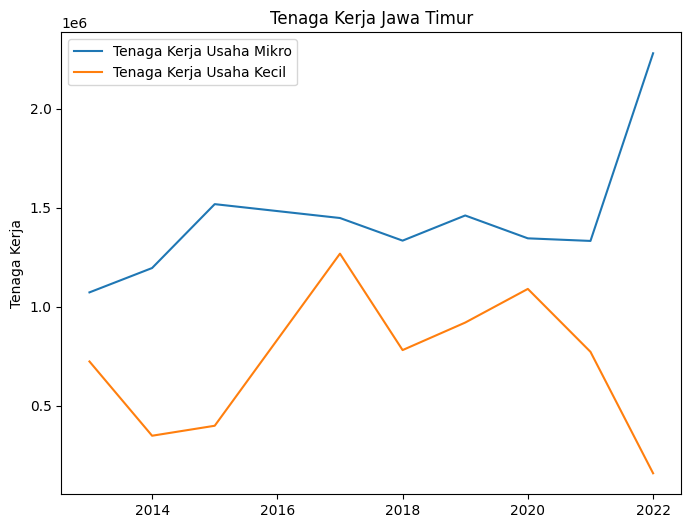

In [ ]:
plt.figure(figsize=(8, 6))

# Plotting the line
plt.plot(df_tk_indexed['Mikro'], label='Tenaga Kerja Usaha Mikro')
plt.plot(df_tk_indexed['Kecil'], label='Tenaga Kerja Usaha Kecil')

# Set title and labels
plt.title('Tenaga Kerja Jawa Timur')
plt.xlabel('')
plt.ylabel('Tenaga Kerja')

# Show legend
plt.legend()

plt.show()

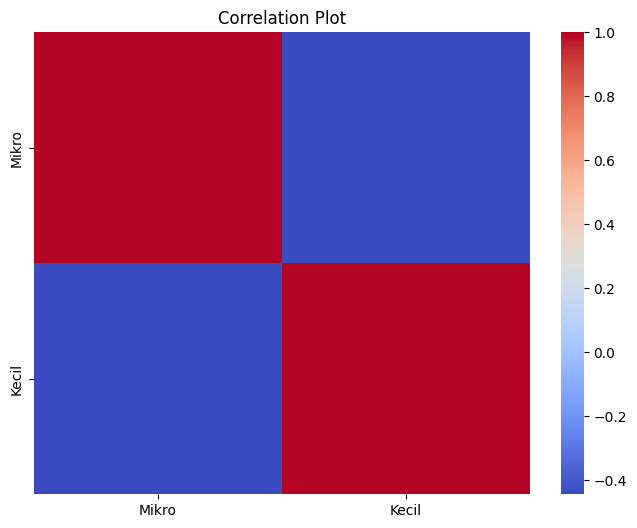

In [ ]:
# Compute the correlation matrix
corr_matrix = df_tk_indexed.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

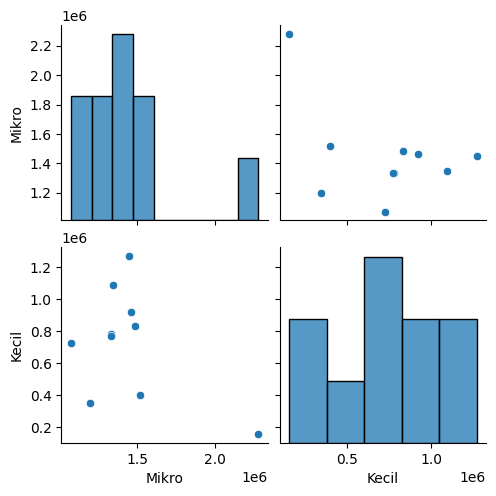

In [ ]:
# Assuming df_tk is your DataFrame
columns_to_plot = ['Mikro', 'Kecil']

# Creating a DataFrame with the specified columns
pairplot_data = df_tk[columns_to_plot]

# Plotting pairplot
sns.pairplot(pairplot_data)
plt.show()

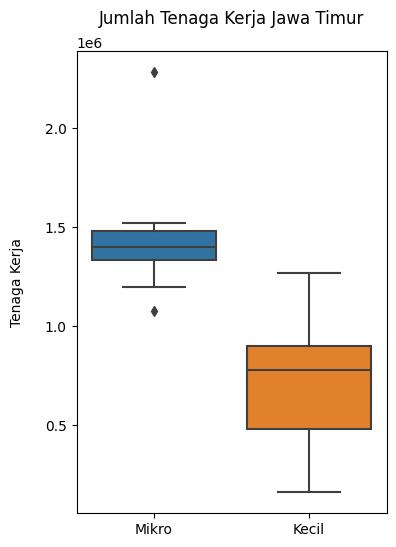

In [ ]:
plt.figure(figsize=(4, 6))

data_melted = df_tk[['Mikro', 'Kecil']].dropna().melt()

sns.boxplot(x='variable', y='value', data=data_melted)
plt.title('Jumlah Tenaga Kerja Jawa Timur', pad=20)
plt.ylabel('Tenaga Kerja', labelpad=15)
plt.xlabel('')
plt.show()

## Penduduk Berumur 15 Tahun ke Atas Jawa Timur dan Jenis Kegiatan Selama Seminggu yang Lalu 2018 - 2023

In [ ]:
df_penduduk_indexed.describe().round(2)

,Angkatan Kerja - Bekerja,Angkatan Kerja Pengangguran - Pernah Bekerja,Angkatan Kerja Pengangguran - Tidak Pernah Bekerja,Angkatan Kerja Pengangguran - Jumlah,Angkatan Kerja - Jumlah Angkatan Kerja,Angkatan Kerja - Persentase Bekerja terhadap Angkatan Kerja,Bukan Angkatan Kerja - Sekolah,Bukan Angkatan Kerja - Mengurus Rumah Tangga,Bukan Angkatan Kerja - Lainnya,Bukan Angkatan Kerja - Jumlah Bukan Angkatan Kerja,Angkatan Kerja + Bukan Angkatan Kerja (Jumlah ),Persentase Angkatan Kerja terhadap Penduduk Usia Kerja
count,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
mean,20943918.20,582479.20,524018.20,1106497.40,22050415.60,95.00,2148748.20,5933215.00,1330368.20,9412331.40,31462747.00,70.08
std,442816.10,155944.66,98362.43,237342.59,643059.92,0.96,128784.36,33769.45,163496.29,119353.49,604231.49,0.76
min,20449949.00,422084.00,421670.00,843754.00,21300423.00,94.16,2038831.00,5899262.00,1176853.00,9237479.00,30704485.00,69.37
25%,20655632.00,422282.00,428192.00,850474.00,21499386.00,94.26,2042868.00,5901685.00,1217999.00,9394099.00,30958845.00,69.45
50%,20962967.00,622543.00,528743.00,1255719.00,22264112.00,94.51,2095398.00,5941321.00,1277604.00,9404062.00,31658211.00,70.00
75%,21037750.00,673085.00,608310.00,1281395.00,22319145.00,96.01,2238697.00,5943158.00,1397016.00,9459459.00,31885703.00,70.33
max,21613293.00,772402.00,633176.00,1301145.00,22869012.00,96.08,2327947.00,5980649.00,1582369.00,9566558.00,32106491.00,71.23


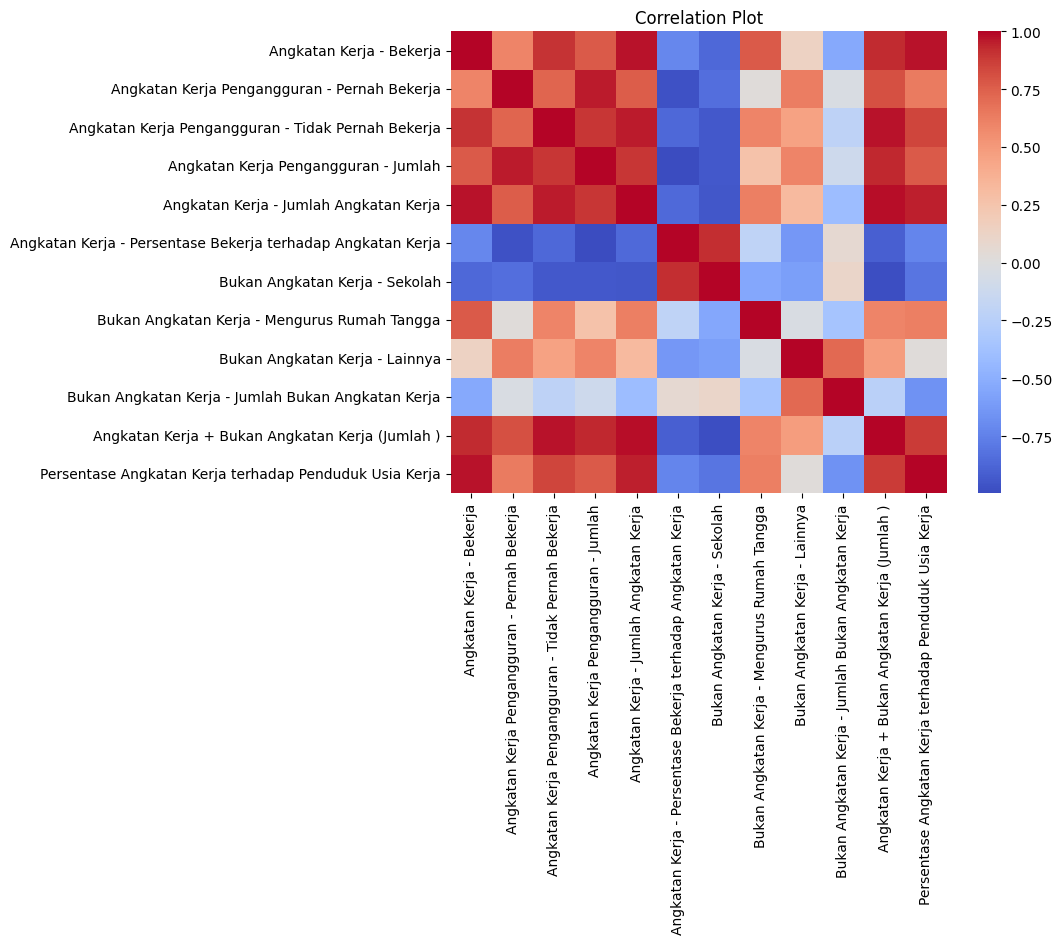

In [ ]:
# Compute the correlation matrix
corr_matrix = df_penduduk_indexed.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

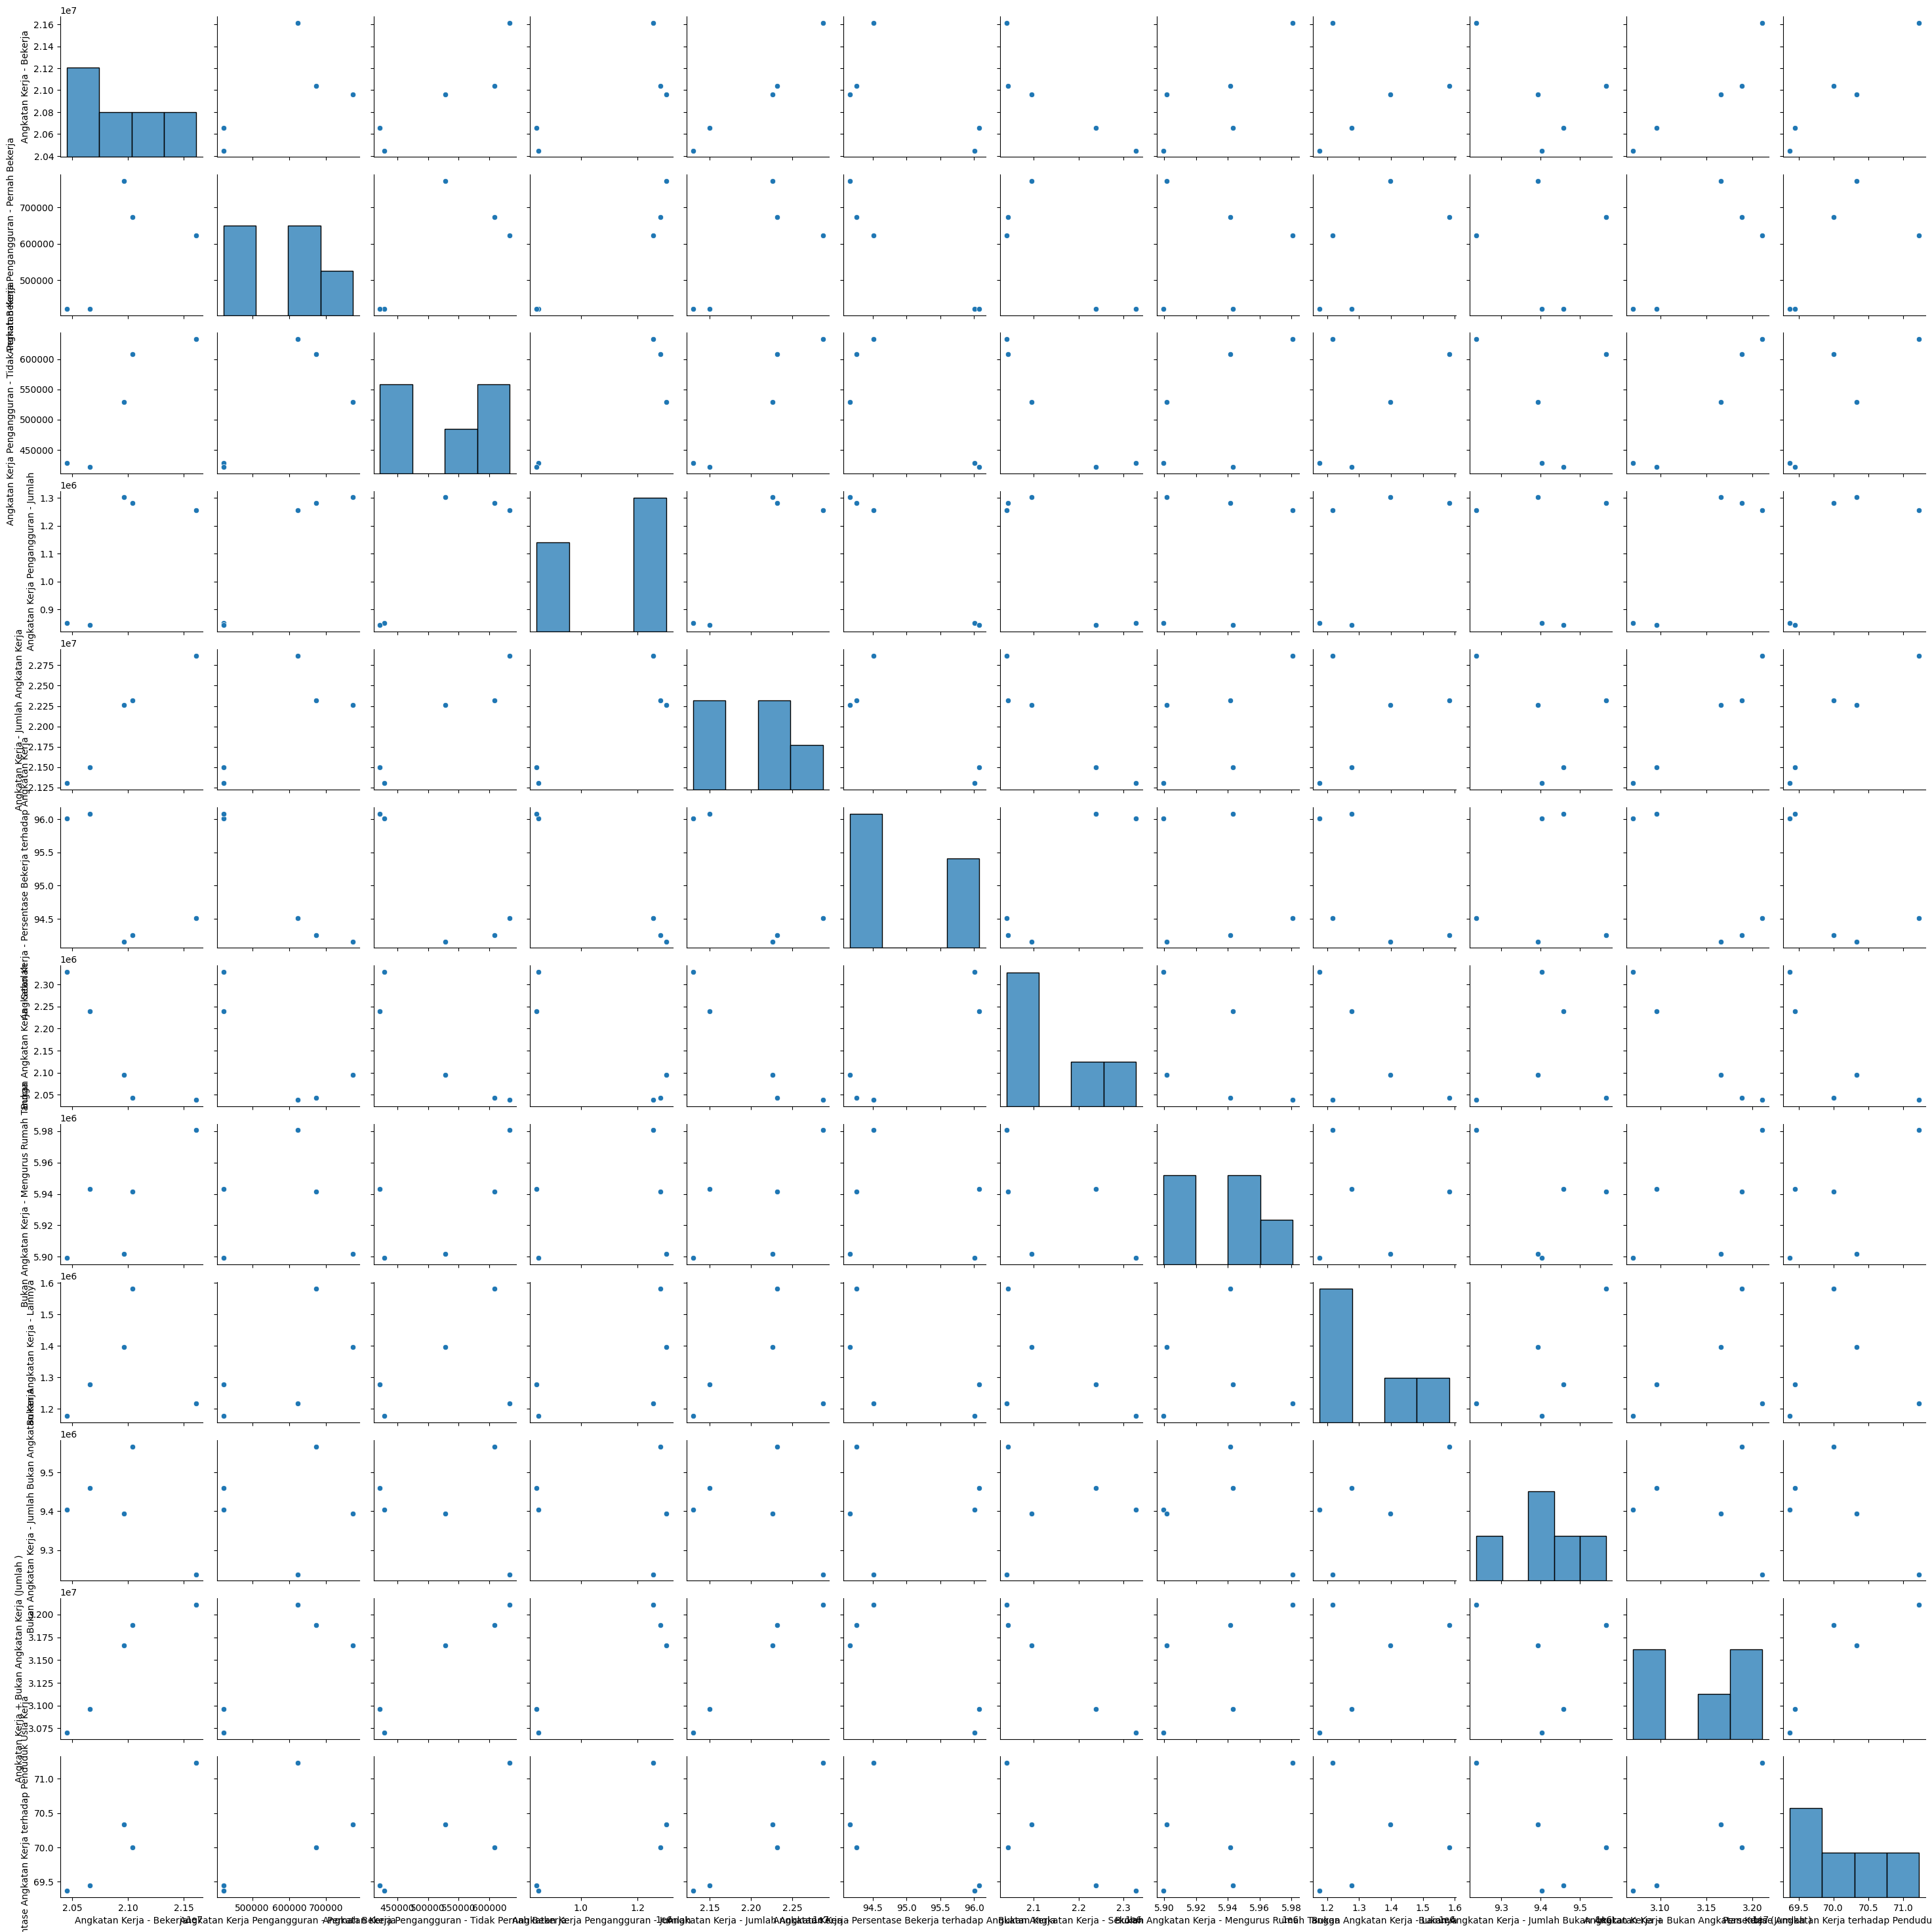

In [ ]:
# Plotting pairplot
sns.pairplot(df_penduduk_indexed)
plt.show()

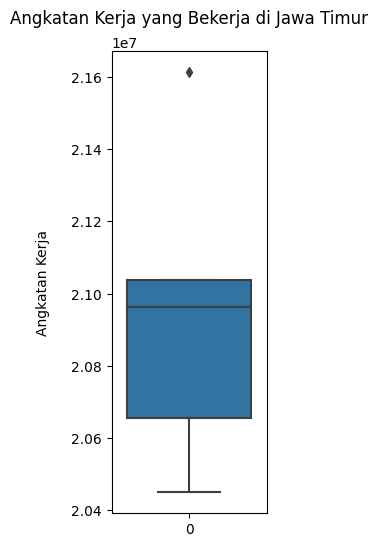

In [ ]:
plt.figure(figsize=(2, 6))
sns.boxplot(data=df_penduduk['Angkatan Kerja - Bekerja'])
plt.title('Angkatan Kerja yang Bekerja di Jawa Timur', pad=20)
plt.ylabel('Angkatan Kerja', labelpad=15)
plt.show()

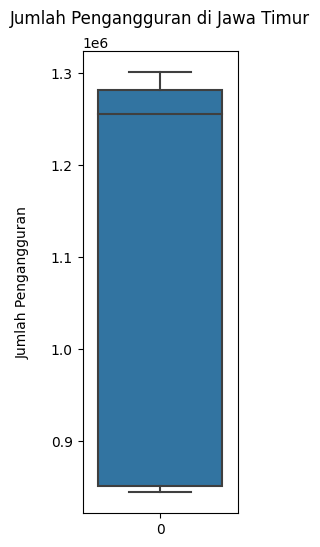

In [ ]:
plt.figure(figsize=(2, 6))
sns.boxplot(data=df_penduduk['Angkatan Kerja Pengangguran - Jumlah'])
plt.title('Jumlah Pengangguran di Jawa Timur', pad=20)
plt.ylabel('Jumlah Pengangguran', labelpad=15)
plt.show()

# Forecasting

## Tingkat Pengangguran Terbuka Jawa Timur 2024 - 2027

In [ ]:
# Define range of p, d, q values
p_values = range(0, 5)
d_values = range(0, 2)
q_values = range(0, 5)

# Generate all different combinations of p, d, q triplets
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

# Grid search to find the best parameters
best_aic = float("inf")
best_order = None

for order in pdq_combinations:
  model = ARIMA(df_tpt['Tingkat Pengangguran Terbuka Jawa Timur (Persen)'], order=order)
  model_fit = model.fit()
  aic = model_fit.aic
  if aic < best_aic:
    best_aic = aic
    best_order = order

print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")

In [ ]:
best_order

(0, 1, 3)

In [ ]:
best_model = ARIMA(df_tpt['Tingkat Pengangguran Terbuka Jawa Timur (Persen)'], order=best_order)
best_model_fit = best_model.fit()
forecast = best_model_fit.forecast(steps=4)

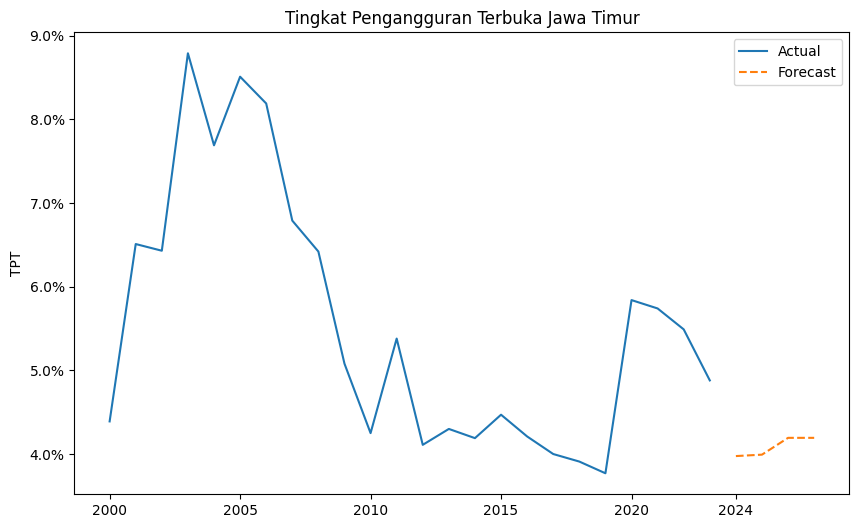

In [ ]:
years_actual = range(2000, 2000 + len(df_tpt))
years_forecast = range(years_actual[-1] + 1, years_actual[-1] + len(forecast) + 1)

plt.figure(figsize=(10, 6))
plt.plot(years_actual, df_tpt['Tingkat Pengangguran Terbuka Jawa Timur (Persen)'], label='Actual')
plt.plot(years_forecast, forecast, label='Forecast', linestyle='dashed')
plt.ylabel('TPT')
plt.title('Tingkat Pengangguran Terbuka Jawa Timur')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y}%'))

# Setting x-axis labels to display years at intervals of 5 for the actual data
plt.xticks(list(years_actual)[::5])

# Adding a specific tick for the forecast (only 2025)
plt.xticks(list(plt.xticks()[0]) + [years_forecast[0]])

plt.legend()
plt.show()